# MOWNIT by Jakub Stępień

## Laboratorium 10 - równania różniczkowe

**Używane pakiety:**

In [3]:
using Plots
using DifferentialEquations

<h3>Wprowadzenie do wszystkich zadań</h3>
    
* Zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* Należy napisać wlasną implementację metody Eulera 
* porównać ją z  metodą  Rungego-Kutty  (np. dostępną  w dowolnym pakiecie numerycznym - dla tych, co lubia Julię - polecam pakiet DifferentialEquations (https://diffeq.sciml.ai/stable/)) dla zadanego na zajęciach równania. 
* <b>Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.</b>

<h3>Punkty:</h3>

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)
* Ewentualne rozszerzenie (extra 3 pkt)

### Zadanie 3: model drapieżnik-ofiara

Zasymuluj model drapieżnik - ofiara 

x(t)- populacja drapieżników

y(t) -populacja ofiar 

a - współczynnik śmierci drapieżników z powodu braku
ofiar 

b- współczynnik narodzin ofiar, gdy nie ma drapieżników

c- efektywność z jaką drapieżnik wykorzystuje 
energię pozyskaną ze zjedzenia
ofiar  $0.0<c=<1.0$ 

d- efektywność uśmiercania ofiar przez drapieżników

$$
\frac{dx}{dt}=
-a*x+c*d*x*y
$$
$$
\frac{dy}{dt}=
b*y-d*x*y
$$

Rozszerzenie:
Zasymulować wirtualne gatunki za pomocą automatu komórkowego:
* https://grimmel.github.io/posts/2020/10/blog-post-1/
* https://mathworld.wolfram.com/CellularAutomaton.html

Funkcja obliczająca pochodną po x oraz y:

In [197]:
function f(du, u, t)  # du = [dx, dy], u = [x, y]
    du[1] = - a * u[1] + c * d * u[1] * u[2]
    du[2] = b * u[2] - d * u[1] * u[2]
end

f (generic function with 2 methods)

Definiujemy stałe oraz wartości początkowe:

In [198]:
a, b, c, d = 10, 2, 0.5, 0.1       # Constants.
u_0 = [10, 10]                     # Starting condition for u.
tspan = (0.0, 30)                  # Time span.

model = ODEProblem(f, u_0, tspan)    # Create model to solve.

ODEProblem with uType Vector{Int64} and tType Float64. In-place: true
timespan: (0.0, 30.0)
u0: 2-element Vector{Int64}:
 10
 10

Rozwiązujemy zdefiniowany model 'prob':

In [199]:
solver = solve(model, RK4(), reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: 3rd order Hermite
t: 11401-element Vector{Float64}:
  0.0
  0.0011423514114507606
  0.0019912168502963135
  0.0032773001178696293
  0.004570464890080674
  0.006100336652065255
  0.0077127447304496605
  0.009464937747317726
  0.011299640014953134
  0.013222943083983724
  0.015210071893363871
  0.017255232298046305
  0.019345517575713504
  ⋮
 29.890636972583586
 29.90124688552397
 29.911856660321867
 29.9224662653604
 29.93307567394264
 29.94368486639926
 29.954293826575107
 29.9649025411264
 29.97551100162817
 29.986119200358605
 29.996727133811568
 30.0
u: 11401-element Vector{Vector{Float64}}:
 [10.0, 10.0]
 [9.892066597829917, 10.01149187327946]
 [9.812622146108811, 10.020119527557988]
 [9.693479642794264, 10.033333333967985]
 [9.575147903812606, 10.046791732365262]
 [9.437030785446748, 10.062934404259426]
 [9.293630627061063, 10.080204849118893]
 [9.140282678645494, 10.099268743326133]
 [8.982441035369472, 10.119557891483101]
 [8.819920273081507, 10.1

In [200]:
plot_1 = plot(solver, title="Population of predators and prays over time",
     xaxis="day",yaxis="population size",label=["Predators" "Prays"])

**Implementacja metody Eulera:**

The approximation is computed using this update:
$y_{n+1}=y_n+(t_n+1−t_n)f(y_n,t_n)$.

The math behind this formula are the following: if g
is a solution to the ODE, and so far the approximation is correct, $$y_n≃g(t_n)$$ then a small step $$h=t_{n+1}−t_n$$ satisfy $$g(t_n+h)≃g(t_n)+hg′(t_n)≃y_n+hf(g(t_n),tn)+≃y_n+hf(y_n,t_n)$$

In [189]:
# Constants.
a = 10
b = 2
c = 0.5
d = 0.1

# Starting condition for u.
u_0 = [10; 10]

# Time span.
tspan = range(0.0, stop=30, length=10000)

0.0:0.003000300030003:30.0

In [190]:
function fun(t, u, du)
    du[1] = - a * u[1] + c * d * u[1] * u[2]
    du[2] = b * u[2] - d * u[1] * u[2]
end

function f_prey(u, t)
    return [- a * u[1] + c * d * u[1] * u[2], b * u[2] - d * u[1] * u[2]]
end

function euler(f, y0, t)
    n = length(t)
    y = zeros((n, length(y0)))
    y[1,:] = y0
    for i in 1:n-1
        h = t[i+1] - t[i]
        y[i+1,:] = y[i,:] + h * f(y[i,:], t[i])
    end
    return y
end

euler (generic function with 2 methods)

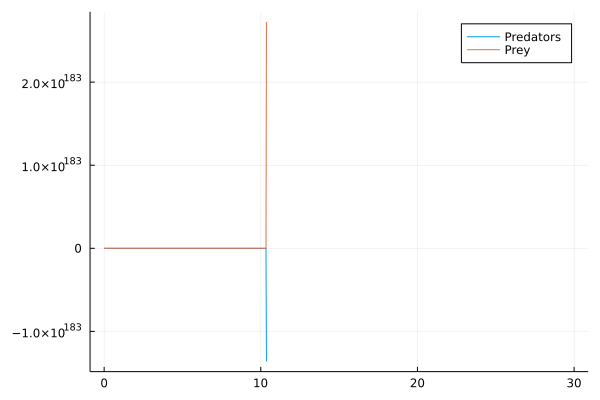

In [196]:
tspan = range(0.0, stop=30, length=1000)
sol = euler(f_prey, u_0, tspan)
plot2 = plot(tspan, sol[:, 1], label="Predators")
plot2 = plot!(tspan, sol[:, 2], label="Prey")

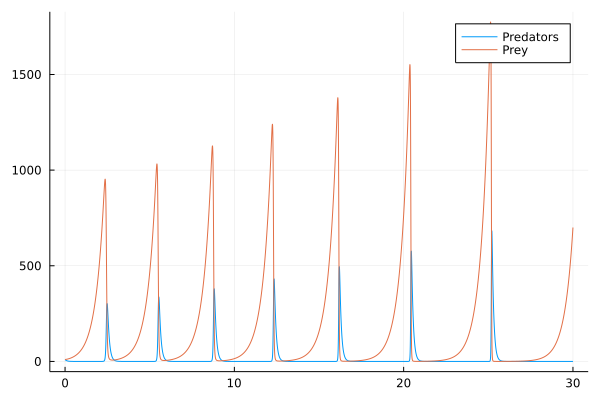

In [191]:
tspan = range(0.0, stop=30, length=10000)
sol = euler(f_prey, u_0, tspan)
plot2 = plot(tspan, sol[:, 1], label="Predators")
plot2 = plot!(tspan, sol[:, 2], label="Prey")

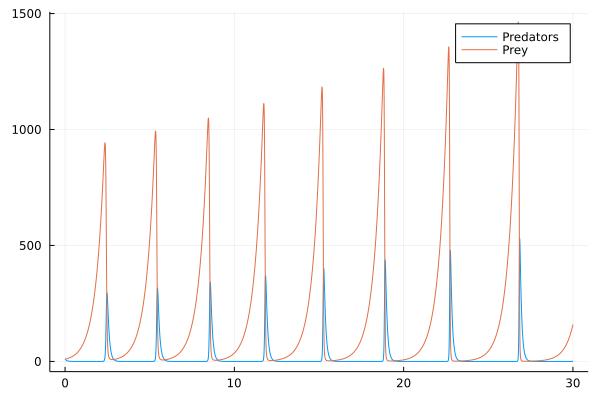

In [192]:
tspan = range(0, stop=30, length=15000)
sol = euler(f_prey, u_0, tspan)
plot2 = plot(tspan, sol[:, 1], label="Predators")
plot2 = plot!(tspan, sol[:, 2], label="Prey")

In [193]:
tspan = range(0, stop=30, length=100000)
sol = euler(f_prey, u_0, tspan)
plot2 = plot(tspan, sol[:, 1], label="Predators")
plot2 = plot!(tspan, sol[:, 2], label="Prey")